<a href="https://colab.research.google.com/github/arthurbviana/data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Berlim).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Berlim*

O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para que possam anunciar seu espaço e reservar acomodações únicas, em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlin (good for visualisations).*

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2020-12-21/visualisations/listings.csv")

## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - nome do distrito
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,42,5,134,2020-09-26,2.34,6,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,146,2020-05-27,1.04,1,276
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.30,1,355
3,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,133,2020-02-16,1.01,1,14
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.12,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa (`listings.csv.gz`).

In [6]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20224
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
 
* É possível ver que as variáveis `reviews_per_month` e `last_review` possuem valores nulos em 20% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.200752
last_review                       0.200752
host_name                         0.001879
name                              0.001582
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, irei plotar o histograma.

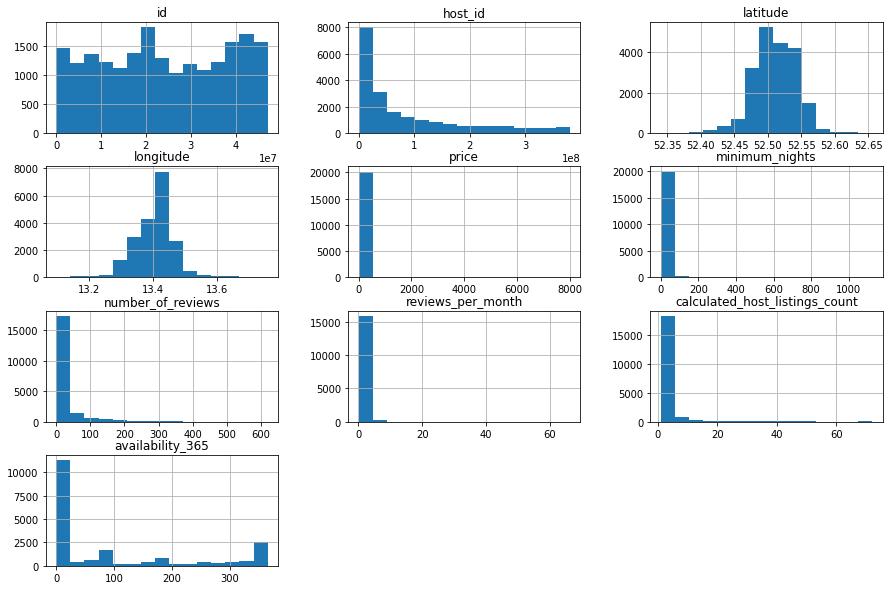

In [17]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [35]:
# ver a média da coluna `price``
df[['price']].describe()

,price
count,20224.000000
mean,72.951543
std,139.083024
min,0.000000
25%,35.000000
50%,50.000000
75%,80.000000
max,8000.000000


Olhando o resumo estatístico acima, podemos confirmar que a média da coluna `price` é 72.951543, ou seja, uma média de quase 73 euros para aluguel.

### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [10]:
# criar uma matriz de correlação
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.036996,0.041365,0.078366,0.126230,0.209586
minimum_nights,-0.036996,1.000000,-0.091846,-0.114479,0.078750,0.064576
number_of_reviews,0.041365,-0.091846,1.000000,0.718845,0.052955,0.221776
reviews_per_month,0.078366,-0.114479,0.718845,1.000000,0.123323,0.244845
calculated_host_listings_count,0.126230,0.078750,0.052955,0.123323,1.000000,0.224740
availability_365,0.209586,0.064576,0.221776,0.244845,0.224740,1.000000


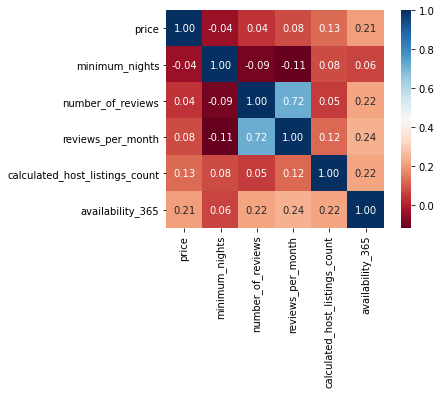

In [11]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10317
Private room        8529
Shared room          272
Hotel room           216
Name: room_type, dtype: int64

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.533620
Private room       0.441140
Shared room        0.014068
Hotel room         0.011172
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Berlin?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [14]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Marzahn-Nord           500.000000
Siemensstadt           199.800000
Haselhorst             157.230769
Charlottenburg Nord    120.916667
Regierungsviertel      120.678571
Zehlendorf  Südwest    117.847826
Spandau Mitte          114.391304
Kurfürstendamm         110.080000
Rummelsburger Bucht    109.815789
Schöneberg-Nord        109.583149
Name: price, dtype: float64

Acima, vemos que o bairro Marzahn-Nord está com média de preço muito superior a dos outros lugares.

Uma pessoa que não conhecesse Berlin poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para Marzahn-Nord.

In [48]:
print(df_clean[df_clean.neighbourhood == "Marzahn-Nord"].shape)
df_clean[df_clean.neighbourhood == "Marzahn-Nord"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6120,14924783,Nice penthouse!,48847517,Claire,Marzahn - Hellersdorf,Marzahn-Nord,52.5624,13.57121,Entire home/apt,500,2,0,NaN,NaN,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

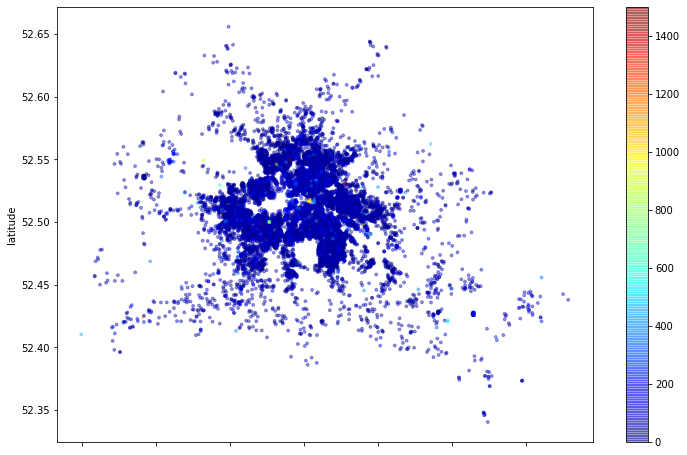

In [15]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [16]:
# ver a média da coluna `minimum_nights``
df_clean[['minimum_nights']].describe()

,minimum_nights
count,19334.000000
mean,4.275059
std,5.755080
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,30.000000


Olhando o resumo estatístico acima, podemos confirmar que a média da coluna `minimum_nights` é 4.275059, ou seja, uma média de 4 noites de hospedagem no mínimo.

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis, apesar de serem uma pequena quantidade. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.